In [1]:
import sys
import os
import json

sys.path.append("../../..")

from dataloaders.base import make_feature_fn, BaseEventLogDataset
from dataloaders.csv import CSVEventLogDataset
from dataloaders.xes import XESEventLogDataset

DATA_DIR = "../../../data"
datasets = os.listdir(DATA_DIR)
datasets

['e30ba0c8-0039-4835-a493-6e3aa2301d3f',
 'db35afac-2133-40f3-a565-2dc77a9329a3',
 'ed445cdd-27d5-4d77-a1f7-59fe7360cfbe',
 '3301445f-95e8-4ff0-98a4-901f1f204972',
 '3d5ae0ce-198c-4b5c-b0f9-60d3035d07bf',
 '3537c19d-6c64-4b1d-815d-915ab0e479da',
 '500573e6-accc-4b0c-9576-aa5468b10cee',
 'c2c3b154-ab26-4b31-a0e8-8f2350ddac11',
 '91fd1fa8-4df4-4b1a-9a3f-0116c412378f',
 '679b11cf-47cd-459e-a6de-9ca614e25985',
 '6a0a26d2-82d0-4018-b1cd-89afb0e8627f',
 'a6f651a7-5ce0-4bc6-8be1-a7747effa1cc',
 '86977bac-f874-49cf-8337-80f26bf5d2ef',
 '63a8435a-077d-4ece-97cd-2c76d394d99c',
 'fb84cf2d-166f-4de2-87be-62ee317077e5',
 '5f3067df-f10b-45da-b98b-86ae4c7a310b',
 '6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd',
 '12683249',
 '9b99a146-51b5-48df-aa70-288a76c82ec4',
 '33632f3c-5c48-40cf-8d8f-2db57f5a6ce7',
 'b32c6fe5-f212-4286-9774-58dd53511cf8',
 'd9769f3d-0ab0-4fb8-803b-0d1120ffcf54',
 '3cfa2260-f5c5-44be-afe1-b70d35288d6d',
 '2b02709f-9a84-4538-a76a-eb002eacf8d1',
 'c3f3ba2d-e81e-4274-87c7-882fa1dbab0d',
 'a

In [2]:
def filter_files(fs: list[str]) -> list[str]:
    return list(filter(lambda f: f.endswith('.csv') or f.endswith('.xes'), fs))

files = {d: filter_files(os.listdir(f"{DATA_DIR}/{d}")) for d in datasets}
files

{'e30ba0c8-0039-4835-a493-6e3aa2301d3f': ['BPI2016_Complaints.csv'],
 'db35afac-2133-40f3-a565-2dc77a9329a3': ['PermitLog.xes'],
 'ed445cdd-27d5-4d77-a1f7-59fe7360cfbe': ['BPIC15_3.xes'],
 '3301445f-95e8-4ff0-98a4-901f1f204972': ['BPI%20Challenge%202018.xes'],
 '3d5ae0ce-198c-4b5c-b0f9-60d3035d07bf': ['Detail_Interaction.csv'],
 '3537c19d-6c64-4b1d-815d-915ab0e479da': ['BPI_Challenge_2013_open_problems.xes'],
 '500573e6-accc-4b0c-9576-aa5468b10cee': ['BPI_Challenge_2013_incidents.xes'],
 'c2c3b154-ab26-4b31-a0e8-8f2350ddac11': ['BPI_Challenge_2013_closed_problems.xes'],
 '91fd1fa8-4df4-4b1a-9a3f-0116c412378f': ['InternationalDeclarations.xes'],
 '679b11cf-47cd-459e-a6de-9ca614e25985': ['BPIC15_4.xes'],
 '6a0a26d2-82d0-4018-b1cd-89afb0e8627f': ['DomesticDeclarations.xes'],
 'a6f651a7-5ce0-4bc6-8be1-a7747effa1cc': ['RequestForPayment.xes'],
 '86977bac-f874-49cf-8337-80f26bf5d2ef': ['Detail_Incident_Activity.csv'],
 '63a8435a-077d-4ece-97cd-2c76d394d99c': ['BPIC15_2.xes'],
 'fb84cf2d-166f

In [3]:
from dataloaders.util import CONSTRUCTION_PARAMS, DEFAULT_PARAMS_CSV, DEFAULT_PARAMS_XES

def get_ds(path: str):
    print(path)
    dataset_ftype = path.split(".")[-1].strip()
    match dataset_ftype:
        case "csv":
            doi = path.split('/')[-2]
            params = CONSTRUCTION_PARAMS.get(doi, DEFAULT_PARAMS_CSV)
            ensure_type = params.get("rtype")
            if ensure_type is not None:
                if ensure_type != "csv":
                    raise ValueError(f"Something went wrong... params says this Dataset is a different type than csv: {ensure_type}")
            return CSVEventLogDataset(
                source_path=path,
                feature_fn=make_feature_fn,
                **params
            )
        case "xes":
            doi = path.split('/')[-2]
            params = CONSTRUCTION_PARAMS.get(doi, DEFAULT_PARAMS_XES)
            ensure_type = params.get("rtype")
            if ensure_type is not None:
                if ensure_type != "xes":
                    raise ValueError(f"Something went wrong... params says this Dataset is a different type than xes: {ensure_type}")
            return XESEventLogDataset(
                source_path=path,
                feature_fn=make_feature_fn,
                **params
            )
        case _:
            raise ValueError(f"unknown dataset source type: '{dataset_ftype}'")

In [4]:
def make_path(uuid: str):
    for f in files[uuid]:
        yield f"{DATA_DIR}/{uuid}/{f}"
uuid = "c3f3ba2d-e81e-4274-87c7-882fa1dbab0d"
pth = list(make_path(uuid))[0]
test_ds = get_ds(pth)

../../../data/c3f3ba2d-e81e-4274-87c7-882fa1dbab0d/BPI2016_Werkmap_Messages.csv


In [5]:
print(test_ds.source_path)

../../../data/c3f3ba2d-e81e-4274-87c7-882fa1dbab0d/BPI2016_Werkmap_Messages.csv


In [6]:
from dataloaders.net import ProcessModelDataset, DISCOVERY_METHODS, PARAM_GRID
import logging

logging.getLogger("root").setLevel(logging.WARN)
logging.getLogger("pulp").setLevel(logging.WARN)

pm_dataset = ProcessModelDataset(
    log_dataset=test_ds,
    discovery_methods=DISCOVERY_METHODS.GURANTEED_SOUND,
    param_grid=PARAM_GRID.STANDARD,
    cached=True,
)

Caching discovered models: 0it [00:00, ?it/s]


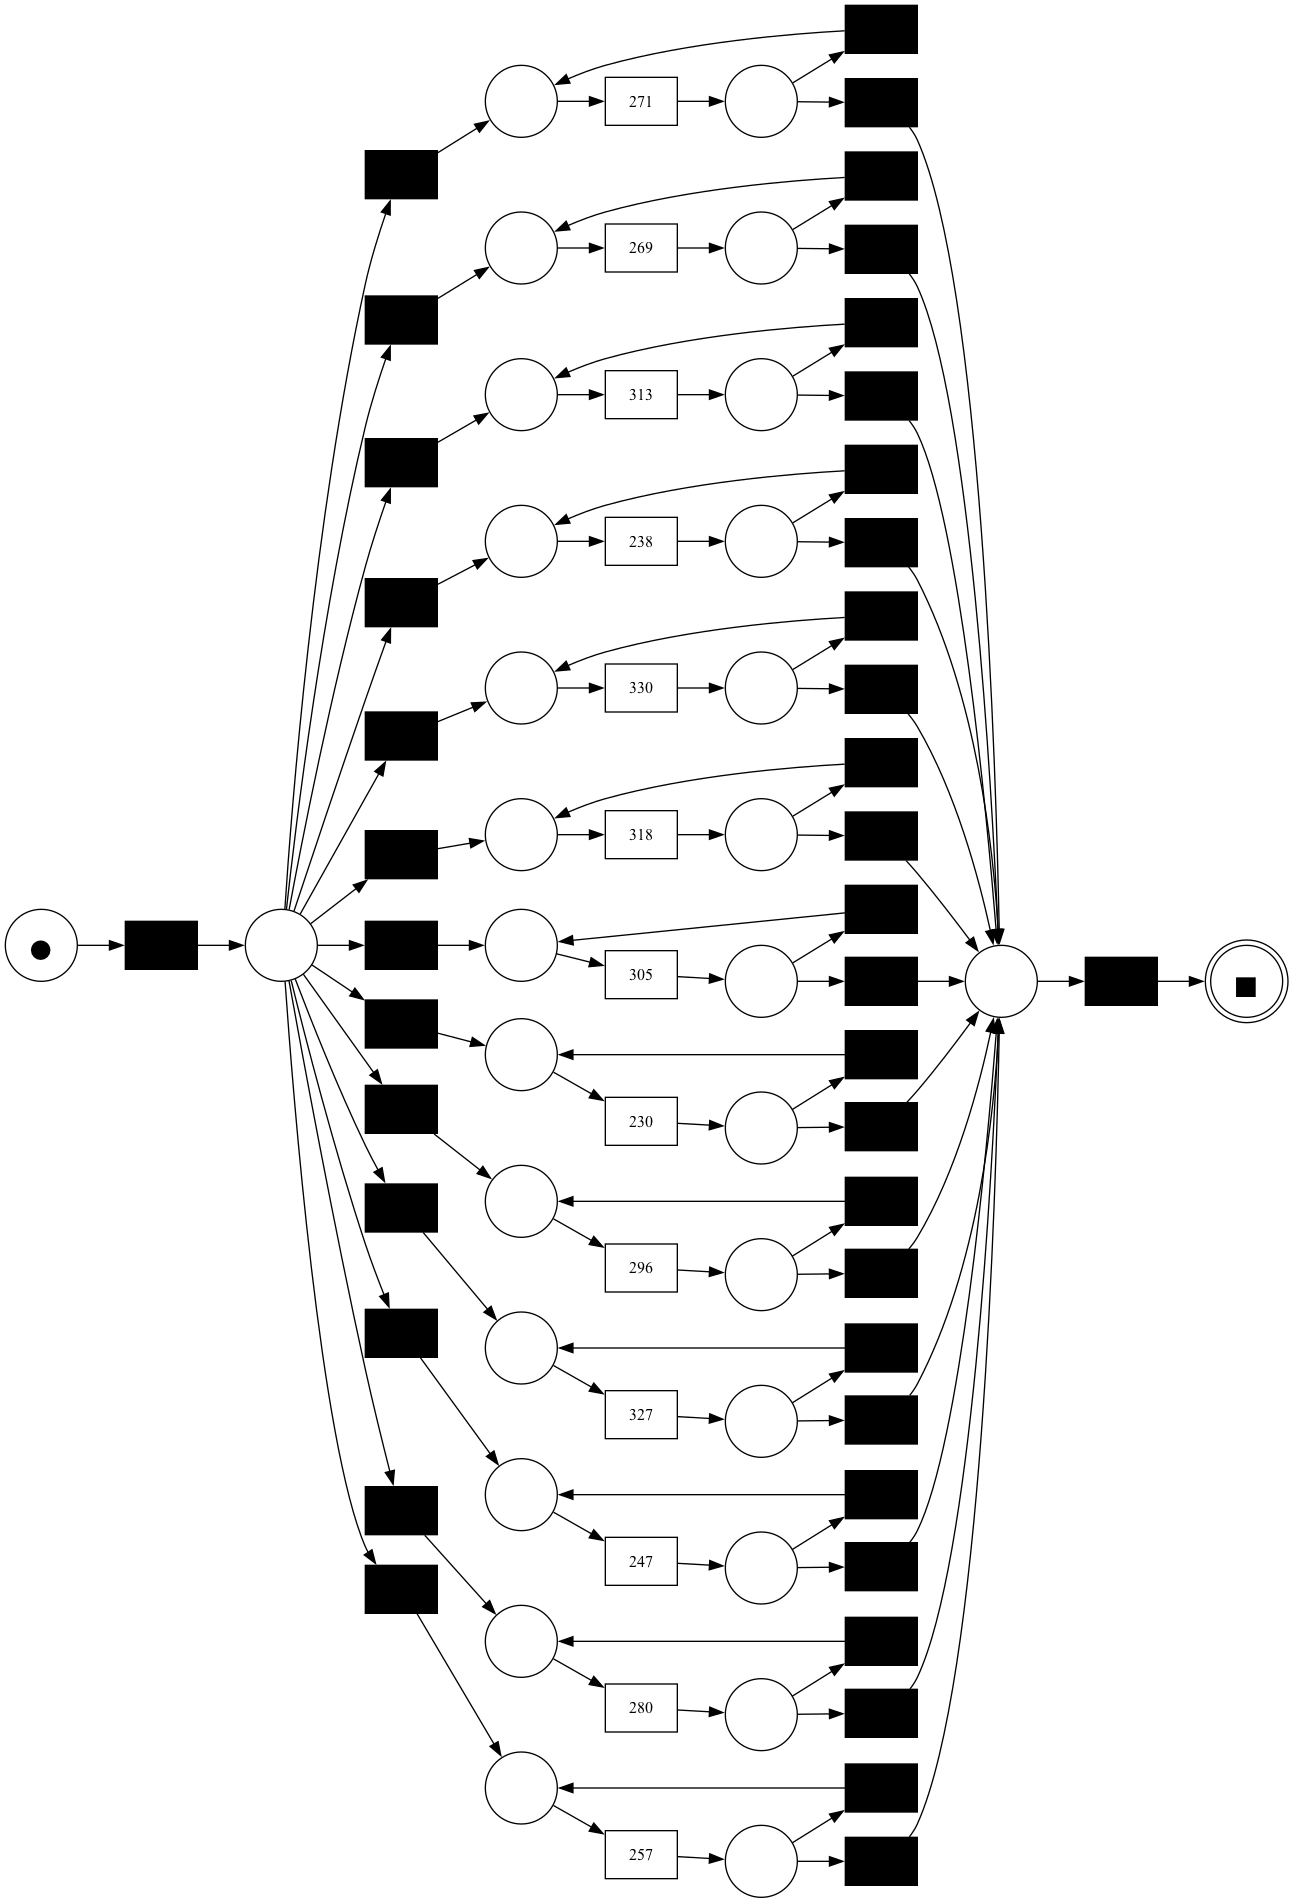

In [7]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.vis import _select_petri_net_variant, _extract_format, _setup_parameters, view_petri_net
# ensure graphviz executables are visible to notebook (this sucks)
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

for process_model in pm_dataset:
    view_petri_net(process_model["pm"], process_model["im"], process_model["fm"])
    break

In [8]:
from net_atlas import build_atlas
build_atlas(list(pm_dataset)[:1000])

/Users/paul/dev/pm_ws25/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Rendering SVGs:   6%|▌         | 60/1000 [00:19<05:16,  2.97it/s]

KeyboardInterrupt: 

In [9]:
uuid = "6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd"
pth = list(make_path(uuid))[0]
test_ds = get_ds(pth)

../../../data/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/Hospital%20Billing%20-%20Event%20Log.xes


/Users/paul/dev/pm_ws25/pm4py/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:10<00:00, 9554.37it/s]


In [10]:
pm_dataset = ProcessModelDataset(
    log_dataset=test_ds,
    discovery_methods=DISCOVERY_METHODS.GURANTEED_SOUND,
    param_grid=PARAM_GRID.STANDARD,
    cached=True,
)

Caching discovered models: 0it [00:00, ?it/s]


In [11]:
build_atlas(list(pm_dataset)[:1000])

Embedding structural features: 100%|██████████| 1000/1000 [00:00<00:00, 6433.68it/s]
/Users/paul/dev/pm_ws25/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Done.
SVGs: petri_atlas_out_2/svgs
Atlas: petri_atlas_out_2/atlas.html


/Users/paul/dev/pm_ws25/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paul/dev/pm_ws25/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
